In [463]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from subprocess import check_output

from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [464]:
data=pd.read_csv('wdbc.data',header=None)

data.head()

In [465]:
headers=['id','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

In [466]:
data.to_csv('labeledData.csv',header=headers,index=False)

In [467]:
data=pd.read_csv('labeledData.csv')
data.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [468]:
data.shape

(569, 32)

In [469]:
data.isna().sum()

id                         0
diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave points        0
mean_symmetry              0
mean_fractal dimension     0
SE_radius                  0
SE_texture                 0
SE_perimeter               0
SE_area                    0
SE_smoothness              0
SE_compactness             0
SE_concavity               0
SE_concave points          0
SE_symmetry                0
SE_fractal dimension       0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave points       0
worst_symmetry             0
worst_fractal dimension    0
dtype: int64

In [470]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [471]:
data.dtypes

id                           int64
diagnosis                   object
mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave points        float64
mean_symmetry              float64
mean_fractal dimension     float64
SE_radius                  float64
SE_texture                 float64
SE_perimeter               float64
SE_area                    float64
SE_smoothness              float64
SE_compactness             float64
SE_concavity               float64
SE_concave points          float64
SE_symmetry                float64
SE_fractal dimension       float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity     

In [472]:
def diag(z):
    if z=='M':
        return 1
    else:
        return 0
        
y=data['diagnosis'].apply(diag)
data.diagnosis=y


df=pd.DataFrame(data=data)
df=df.drop('id',axis=1)
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

x_scaled=x.apply(zscore)
x=x_scaled



<Axes: >

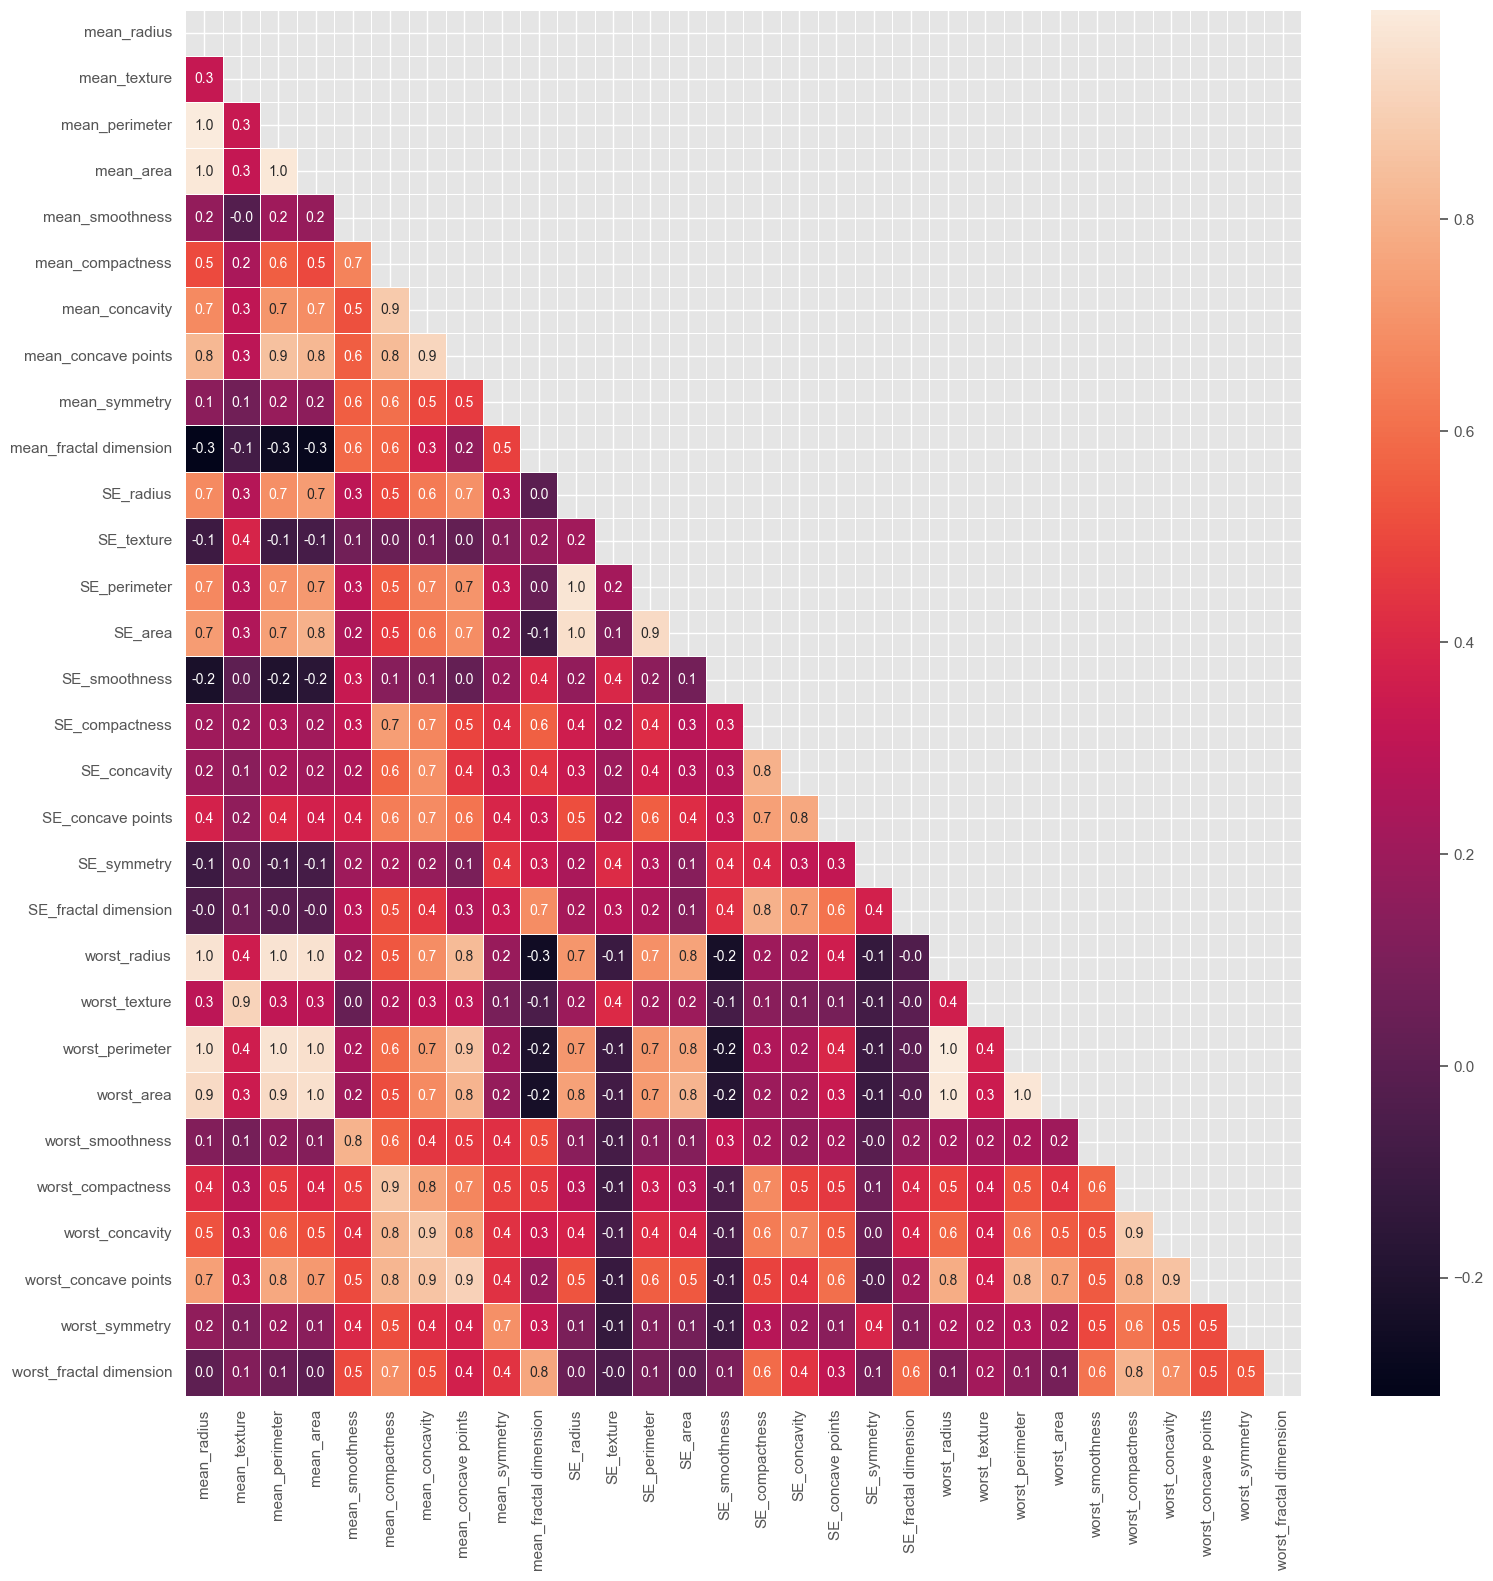

In [473]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(x.corr())
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

In [474]:

# Create correlation matrix
corr_matrix = x.corr().abs()# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [475]:
to_drop

['mean_perimeter',
 'mean_area',
 'mean_concavity',
 'mean_concave points',
 'SE_perimeter',
 'SE_area',
 'SE_concavity',
 'SE_fractal dimension',
 'worst_radius',
 'worst_texture',
 'worst_perimeter',
 'worst_area',
 'worst_smoothness',
 'worst_compactness',
 'worst_concavity',
 'worst_concave points',
 'worst_fractal dimension']

In [476]:
# Drop features 
x1 = x.drop(x[to_drop], axis=1)
x1.columns

Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'mean_compactness',
       'mean_symmetry', 'mean_fractal dimension', 'SE_radius', 'SE_texture',
       'SE_smoothness', 'SE_compactness', 'SE_concave points', 'SE_symmetry',
       'worst_symmetry'],
      dtype='object')

In [477]:
x1.head()

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_symmetry,mean_fractal dimension,SE_radius,SE_texture,SE_smoothness,SE_compactness,SE_concave points,SE_symmetry,worst_symmetry
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747,2.489734,-0.565265,-0.214002,1.316862,0.660820,1.148757,2.750622
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652,0.499255,-0.876244,-0.605351,-0.692926,0.260162,-0.805450,-0.243890
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008,1.228676,-0.780083,-0.297005,0.814974,1.424827,0.237036,1.152255
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919,0.326373,-0.110409,0.689702,2.744280,1.115007,4.732680,6.046041
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450,1.270543,-0.790244,1.483067,-0.048520,1.144205,-0.361092,-0.868353


<Axes: >

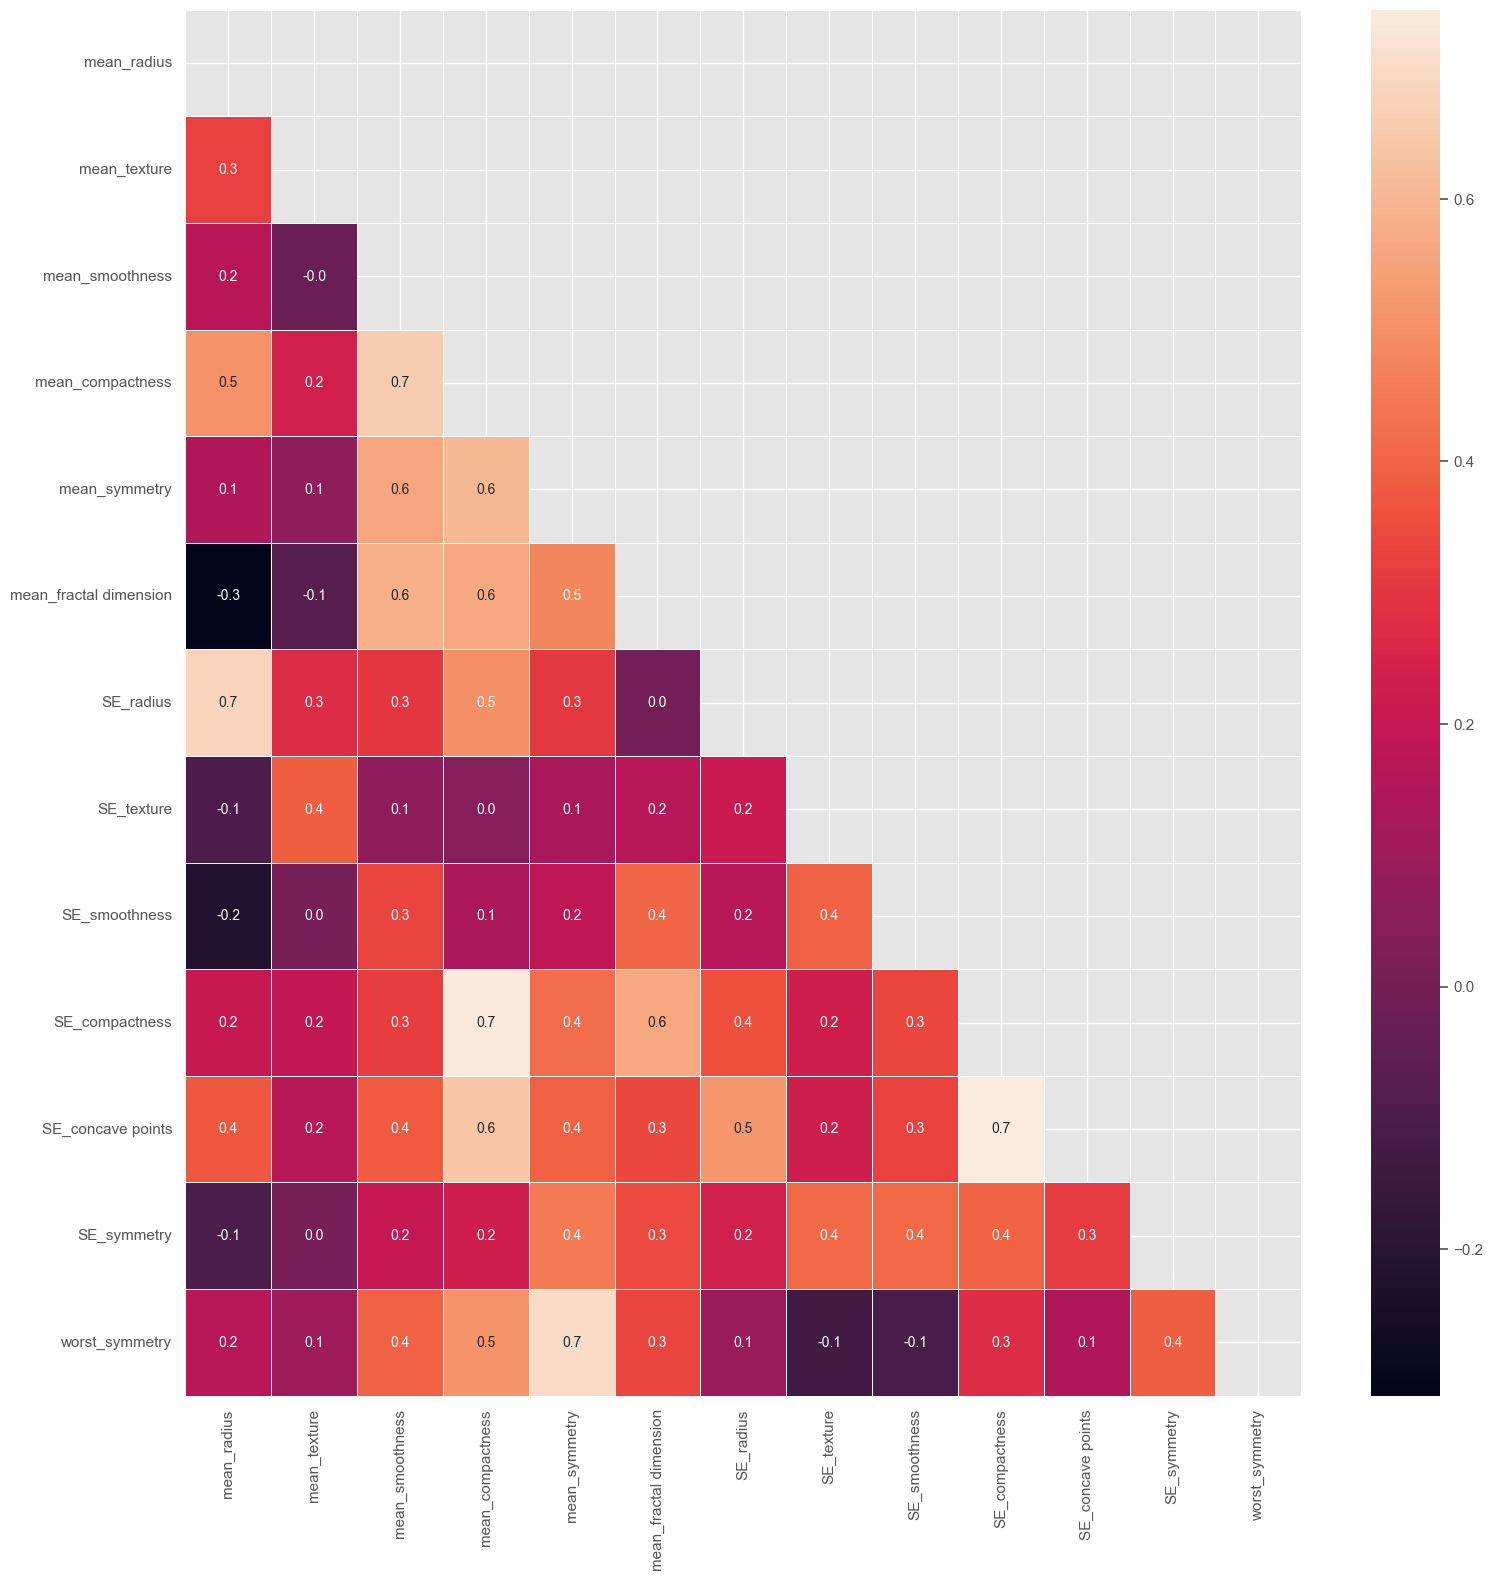

In [478]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(x1.corr())
sns.heatmap(x1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

In [479]:
from sklearn.model_selection import train_test_split

In [480]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Accuracy is: 0.9707602339181286


<Axes: >

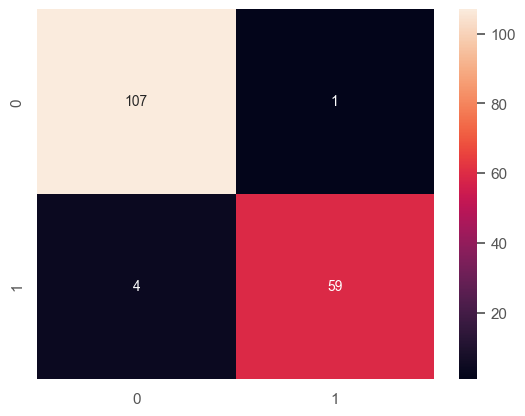

In [481]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score



RFCl=RandomForestClassifier(random_state=42)
RFCl=RFCl.fit(x_train,y_train)
acc=accuracy_score(y_test,RFCl.predict(x_test))
print('Accuracy is:',acc)
cm=confusion_matrix(y_test,RFCl.predict(x_test))
sns.heatmap(cm,annot=True,fmt='d')

In [353]:
#Since dimensionality reduction improved efficiency but not importance, we'll assess the results of the Random Forest algorithm using all features. 


In [482]:

y_pred=RFCl.predict(x_test)



In [483]:
false_negatives=np.logical_and(y_test!=y_pred,y_pred==0)
x_test[false_negatives]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.062293,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489
86,0.100174,0.505055,0.093953,-0.019024,-0.136658,-0.092312,0.396746,0.011887,0.961590,-0.912598,...,-0.012257,0.581805,0.033920,-0.126013,-0.077528,-0.360469,0.300860,0.120195,0.192911,-0.858159
414,0.284783,2.448156,0.195281,0.183760,-0.936557,-1.104700,-0.526547,-0.555322,0.147430,-1.397419,...,0.205179,1.829188,0.084556,0.089332,-0.770135,-0.989865,-0.563654,-0.743914,0.537498,-1.235541


In [484]:
true_negatives=np.logical_and(y_test==y_pred,y_pred==0)
frames=[x_test[false_negatives],x_test[true_negatives]]
pred_neg=pd.concat(frames)
pred_neg

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,0.062293,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,0.025018,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489
86,0.100174,0.505055,0.093953,-0.019024,-0.136658,-0.092312,0.396746,0.011887,0.961590,-0.912598,...,-0.012257,0.581805,0.033920,-0.126013,-0.077528,-0.360469,0.300860,0.120195,0.192911,-0.858159
414,0.284783,2.448156,0.195281,0.183760,-0.936557,-1.104700,-0.526547,-0.555322,0.147430,-1.397419,...,0.205179,1.829188,0.084556,0.089332,-0.770135,-0.989865,-0.563654,-0.743914,0.537498,-1.235541
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.269040,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,-1.035883,-1.002884,-1.008296,-0.913779,0.128078,-0.057631,-0.319515,-0.689709,0.413949,0.900517,...,-0.857154,-0.668836,-0.770000,-0.773804,0.014527,0.288394,0.104162,-0.327467,0.192911,0.693484
69,-0.382650,-0.651497,-0.436576,-0.433410,0.138753,-0.985496,-0.656240,-0.523080,-0.809117,-0.888499,...,-0.581734,-0.963583,-0.643112,-0.572523,-0.121364,-1.168303,-0.807368,-0.849434,-0.837615,-1.099772
542,0.174018,1.426574,0.112489,0.038995,-0.968582,-0.610256,-0.599491,-0.481036,0.103619,-0.850224,...,0.049868,1.076850,0.004134,-0.095249,-1.155891,-0.742153,-0.532950,-0.077750,-0.289188,-0.797202
176,-1.199475,-0.286147,-1.127336,-1.002515,0.044814,0.474905,0.526062,-0.303315,-0.520693,2.603060,...,-1.037316,-0.209616,-1.018414,-0.862051,-0.099446,0.259131,0.366586,-0.236107,-0.463908,1.787392


In [485]:
stacks=[y_test[false_negatives],y_test[true_negatives]]
y_labels=np.hstack(stacks)
y_labels.shape
print(y_labels)

[1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [486]:
new_df=pd.DataFrame(data=pred_neg)
new_df['diagnosis']=y_labels
new_df.shape
new_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,mean_fractal dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension,diagnosis
73,-0.092956,-0.814392,-0.063393,-0.201331,0.308838,0.448373,-0.136966,0.045677,-0.546249,0.405774,...,-0.784455,0.090513,-0.119860,0.382749,0.635726,0.027401,0.360776,-0.504352,1.055903,1
255,-0.047513,-0.521181,-0.022203,-0.149284,0.942210,0.446478,0.114133,0.091333,0.351883,-0.212302,...,-0.587414,0.024984,-0.095952,0.825491,0.457607,0.233695,0.347072,0.270565,-0.242489,1
86,0.100174,0.505055,0.093953,-0.019024,-0.136658,-0.092312,0.396746,0.011887,0.961590,-0.912598,...,0.581805,0.033920,-0.126013,-0.077528,-0.360469,0.300860,0.120195,0.192911,-0.858159,1
414,0.284783,2.448156,0.195281,0.183760,-0.936557,-1.104700,-0.526547,-0.555322,0.147430,-1.397419,...,1.829188,0.084556,0.089332,-0.770135,-0.989865,-0.563654,-0.743914,0.537498,-1.235541,1
204,-0.470694,-0.160486,-0.448110,-0.491999,0.234114,0.027651,-0.109847,-0.276232,0.413949,0.132176,...,-0.168905,-0.333935,-0.356299,0.448503,-0.104741,-0.024412,-0.199563,0.183204,0.196958,0


In [487]:
new_df['diagnosis'].value_counts()

diagnosis
0    107
1      4
Name: count, dtype: int64

In [488]:
new_df_corr=new_df.corr()['diagnosis'].abs().sort_values(ascending=False)
new_df_corr

diagnosis                  1.000000
worst_area                 0.347150
worst_perimeter            0.323486
worst_radius               0.321123
SE_area                    0.279233
mean_area                  0.267354
mean_perimeter             0.254325
mean_radius                0.247434
mean_concave points        0.219731
worst_concave points       0.214209
mean_concavity             0.187883
SE_perimeter               0.172083
SE_radius                  0.161300
mean_compactness           0.135928
worst_compactness          0.131109
worst_concavity            0.130056
mean_texture               0.129921
mean_fractal dimension     0.119010
worst_texture              0.114894
SE_concave points          0.095785
worst_symmetry             0.088230
worst_smoothness           0.084873
mean_symmetry              0.077438
SE_fractal dimension       0.055747
mean_smoothness            0.050663
SE_concavity               0.039701
SE_smoothness              0.027559
SE_compactness             0